# Vino Verde Dataset 

Téléchargez le dataset winequality-red à partir du drive du cours ou en suivant le lien [wine_data](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) qui vous donne une description plus détaillée des données

1. Importez les librairies usuelles 

In [0]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2. Visualisez le  noms des variables du dataset

In [0]:
dataset = pd.read_csv("winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
dataset.quality.unique()

array([5, 6, 7, 4, 8, 3])

3. Donnez le type de toutes les variables explicatives

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


4. Tracez des graphiques représentant la qualité du vin en fonction de chaque variable explicative prise une a une

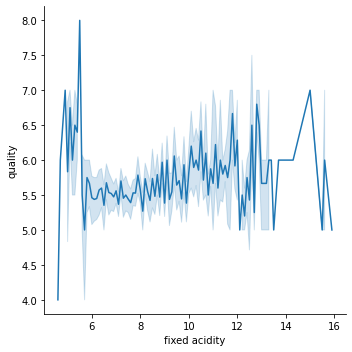

In [0]:
import seaborn as sns 
sns.relplot(x=dataset.columns[0], y=dataset.columns[-1], data=dataset, kind="line")

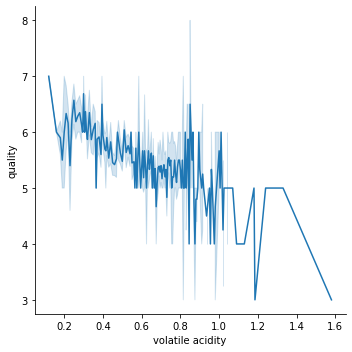

In [0]:
sns.relplot(x=dataset.columns[1], y=dataset.columns[-1], data=dataset, kind="line")

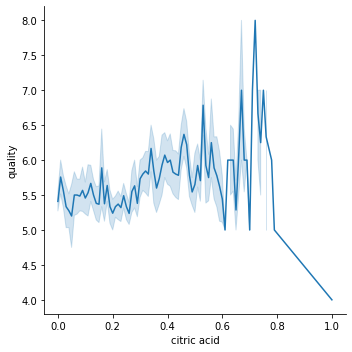

In [0]:
sns.relplot(x=dataset.columns[2], y=dataset.columns[-1], data=dataset, kind="line")

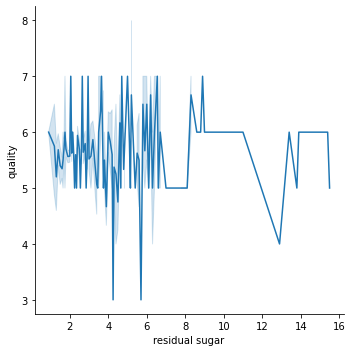

In [0]:
sns.relplot(x=dataset.columns[3], y=dataset.columns[-1], data=dataset, kind="line")

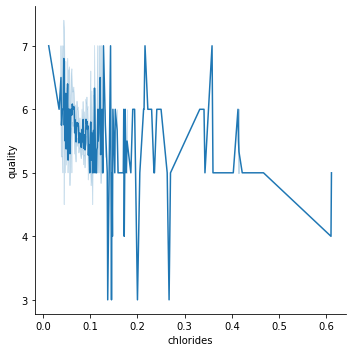

In [0]:
sns.relplot(x=dataset.columns[4], y=dataset.columns[-1], data=dataset, kind="line")

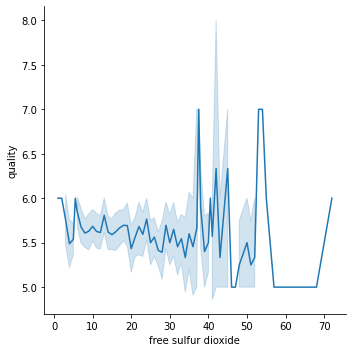

In [0]:
sns.relplot(x=dataset.columns[5], y=dataset.columns[-1], data=dataset, kind="line")

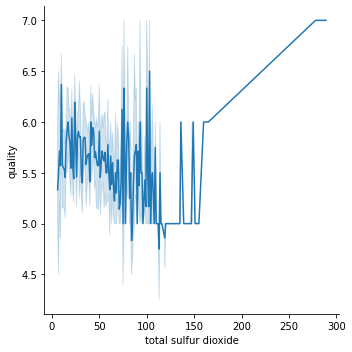

In [0]:
sns.relplot(x=dataset.columns[6], y=dataset.columns[-1], data=dataset, kind="line")

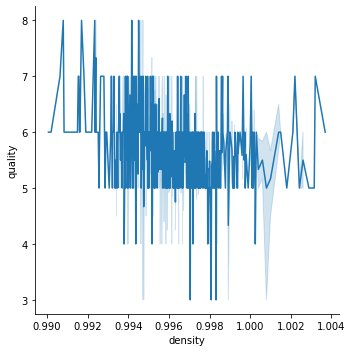

In [0]:
sns.relplot(x=dataset.columns[7], y=dataset.columns[-1], data=dataset, kind="line")

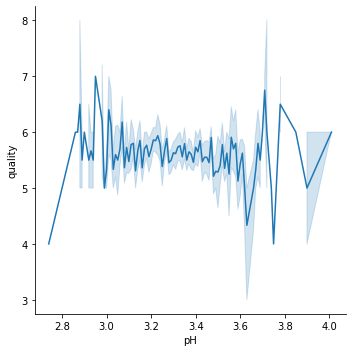

In [0]:
sns.relplot(x=dataset.columns[8], y=dataset.columns[-1], data=dataset, kind="line")

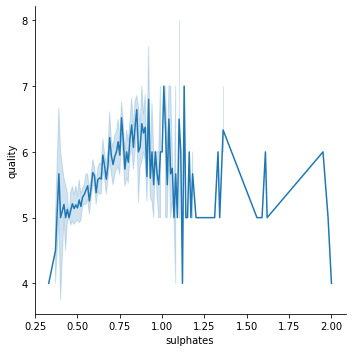

In [0]:
sns.relplot(x=dataset.columns[9], y=dataset.columns[-1], data=dataset, kind="line")

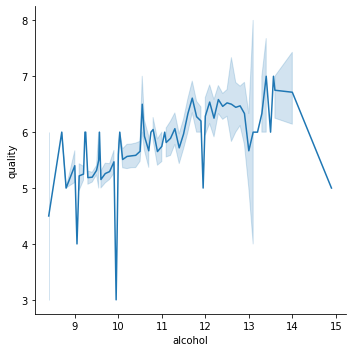

In [0]:
sns.relplot(x=dataset.columns[10], y=dataset.columns[-1], data=dataset, kind="line")

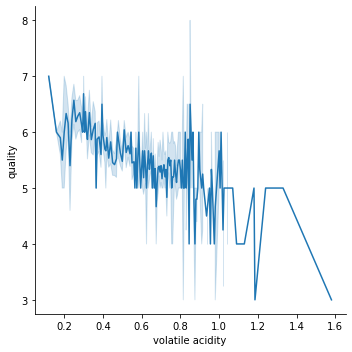

In [0]:
sns.relplot(x=dataset.columns[1], y=dataset.columns[-1], data=dataset, kind="line")

In [0]:
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

5. Les variables ont elles besoin d’encodage ou de normalisation ? Si oui appliquez l’encodage et la normalisation adaptées

In [0]:
## Oui il faut normaliser pour aider l'algorithme à faire ses prédictions

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Calculez votre score. Qu'en pensez-vous ?

In [0]:
classifier.score(X_test, y_test)

0.5909090909090909

7. Faites une cross_validation pour vérifier ce score 

In [0]:
from sklearn.model_selection import cross_val_score
print("Le score après cross validation est {}".format(cross_val_score(classifier, X_test, y_test).mean()))

Le score après cross validation est 0.5871338724168913


8. Créez un ```y_pred``` qui va être la prédiction pour les valeurs de ```X_test```

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
y_pred_proba=classifier.predict_proba(X_test)
y_pred_proba

array([[1.25813116e-04, 1.02571011e-02, 1.21160224e-01, 4.98072196e-01,
        3.47897726e-01, 2.24869401e-02],
       [3.17391027e-04, 1.03345873e-02, 4.03031083e-01, 5.26268341e-01,
        5.92132853e-02, 8.35312113e-04],
       [2.11375780e-04, 2.17313309e-02, 8.81006181e-01, 9.44055079e-02,
        2.42279275e-03, 2.22812181e-04],
       ...,
       [5.57158008e-03, 2.81922718e-02, 4.45858778e-01, 4.47608993e-01,
        7.11060448e-02, 1.66233194e-03],
       [9.06017074e-04, 3.87717354e-02, 5.31920867e-01, 4.04900789e-01,
        2.32604335e-02, 2.40157563e-04],
       [4.24727240e-05, 3.83448112e-03, 2.14561733e-01, 6.08956689e-01,
        1.59533835e-01, 1.30707893e-02]])

9. Créez une matrice de confusion pour voir où vous vous êtes le plus trompé. Mettez celle-ci dans une heatmap

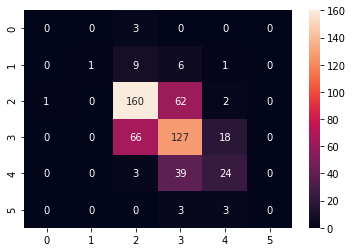

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=True, yticklabels=True)

In [0]:
dataset.quality.unique()

array([5, 6, 7, 4, 8, 3])

10. Regardez la note qui revient le plus souvent dans votre dataset 

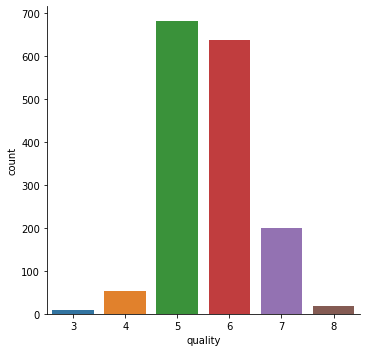

In [0]:
sns.catplot(x=dataset.columns[-1],data =dataset, kind="count")

11. Quel serait votre score si vous avez toujours prédit la valeur 5 ?

In [0]:
y_pred_5 = [5]*len(y_test)
np.array(y_pred_5)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

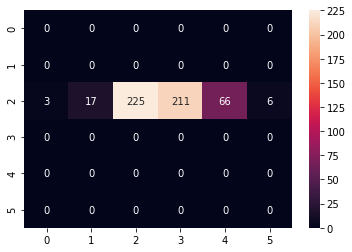

In [0]:
sns.heatmap(confusion_matrix(y_pred_5, y_test), annot=True, fmt="d")

In [0]:
print("Notre score si l'on avait tout le temps prédit la valeur la plus fréquente : {} ".format(225/528))

Notre score si l'on avait tout le temps prédit la valeur la plus fréquente : 0.42613636363636365 


12. Que pouvez vous conclure sur la qualité de votre modèle ? 

----> Notre modèle, bien qu'il ne paraisse pas performant à première vue, est tout de même largement meilleur que si l'on avait prédit la valeur la plus fréquente (qui est généralement une manière d'évaluer notre modèle.). Ce qui est donc une bonne chose ! 

13. Classez maintenant les features les importantes selon votre modèle. Pour cela on pourra s'aider de la métrique Chi2 

Vous pourrez trouver plus de détails dans [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

In [0]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, y)
feature_importance 

(array([1.12606524e+01, 1.55802891e+01, 1.30256651e+01, 4.12329474e+00,
        7.52425579e-01, 1.61936036e+02, 2.75555798e+03, 2.30432045e-04,
        1.54654736e-01, 4.55848775e+00, 4.64298922e+01]),
 array([4.64500416e-02, 8.15035154e-03, 2.31394417e-02, 5.31804675e-01,
        9.79968040e-01, 3.82728810e-33, 0.00000000e+00, 1.00000000e+00,
        9.99526491e-01, 4.72096321e-01, 7.42403757e-09]))

14. Mettez ces valeurs dans un DataFrame pour mieux comprendre ces valeurs 

In [0]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score", ascending=False)
feature_ranking

,Chi2 Score,P-value
total sulfur dioxide,2755.557984,0.000000e+00
free sulfur dioxide,161.936036,3.827288e-33
alcohol,46.429892,7.424038e-09
volatile acidity,15.580289,8.150352e-03
citric acid,13.025665,2.313944e-02
fixed acidity,11.260652,4.645004e-02
sulphates,4.558488,4.720963e-01
residual sugar,4.123295,5.318047e-01
chlorides,0.752426,9.799680e-01
pH,0.154655,9.995265e-01


15. Pour terminer, mettez ces variables dans un bar chart

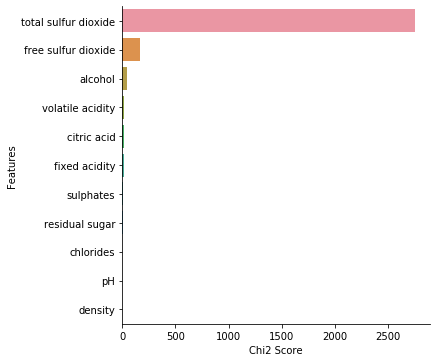

In [0]:
ax =sns.catplot(x="Chi2 Score", y=[index for index in feature_ranking.index], data = feature_ranking.sort_values("Chi2 Score", ascending=False), kind="bar")
ax.set(xlabel="Chi2 Score", ylabel="Features")
plt.show()

In [0]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
y_test.quality.value_counts()

5    225
6    211
7     66
4     17
8      6
3      3
Name: quality, dtype: int64

In [0]:
y_pred

array([5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5,
       5, 6, 5, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6,
       5, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 5, 5, 6, 7, 6,
       5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 4,
       6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 7,
       5, 5, 5, 6, 5, 5, 5, 6, 7, 6, 5, 6, 6, 7, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 6, 7, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6,
       6, 6, 6, 7, 6, 5, 6, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6,